# python 读取Excel，绘制散点图和折线图以及拟合曲线


## 1. `import` 使用 xlrd模块、matplotlib模块，以及numpy模块


In [2]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

## 2. `open excel`  打开文件，获取excel文件的workbook（工作簿）对象

In [3]:
excel = xlrd.open_workbook("C:\\Users\\syl\\Desktop\\工作簿1.xls")

## 3.  `sheet_by_name` 按sheet名称读取sheet对象

In [4]:
data1=excel.sheet_by_name('data1')

## 4.  `row_values` 按行读取数据,`cell_value`读取单元格数据

In [5]:
data_row = []
x=[]
y=[]
labels=data1.row_values(0)
for row in range(1,data1.nrows):
    data_row.append(data1.row_values(row))
    x.append(row)

for col in range(0,data1.ncols):
    temp=[]
    for temp_row in range(1,data1.nrows):
        temp.append(data1.cell_value(temp_row,col))
    y.append(temp)
        
# print(data_row)
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[[0.0396198686602551, 0.0415481635212684, 0.110682777908009, 0.837646132508487, 0.85070384460285, 0.679759920519382, 0.62183623386232, 0.116019805466788, 0.761811877957268, 0.729565129771897, 0.198479789990717, 0.344450324674621, 0.123752891031356, 0.602732896097942, 0.0389358429518845, 0.86356937319846], [0.3099066447978, 0.372484277191521, 0.384924040430962, 0.41867074317232, 0.439161146602236, 0.00638808496545917, 0.0240849424455383, 0.792786114592824, 0.668379233175605, 0.334332188638354, 0.456171209498824, 0.750654879259659, 0.571133458695585, 0.671358821650655, 0.402745778866943, 0.666985978229271], [0.163274216086209, 0.6362629307603, 0.0968489460299156, 0.00407354802789461, 0.033801291945881, 0.331309095399863, 0.465048322434523, 0.609397143771425, 0.951837842617431, 0.0362009723005117, 0.135769811729943, 0.193741675203113, 0.48937213558123, 0.205247089253887, 0.321008279380265, 0.82439478211463]]


## 5. `scatter`  绘制散点图 `plot`  绘制折线图

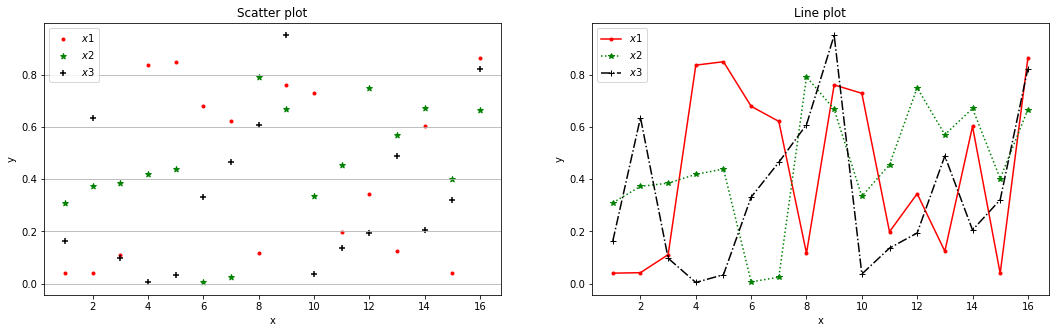

In [6]:
colors =["red","green","black"]
markers=[".","*","+"]
index=0
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
for y_col in y:
    plt.scatter(x, y_col,label='$'+labels[index]+'$',color=colors[index],marker=markers[index])
    plt.legend()
    index=index+1
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(axis='y')

index=0
linestyles=['solid','dotted','dashdot']
plt.subplot(1, 2, 2)
for y_col in y:
    plt.plot(x, y_col,label='$'+labels[index]+'$',color=colors[index],marker=markers[index],linestyle=linestyles[index])
    plt.legend()
    index=index+1
plt.title("Line plot")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

## 6. `np.polyfit` 绘制拟合曲线

`numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)`

- `x`: 要拟合点的横坐标
- `y`: 要拟合点的纵坐标
- `deg`: 自由度.例如:自由度为2,那么拟合出来的曲线就是二次函数,自由度是3,拟合出来的曲线就是3次函数


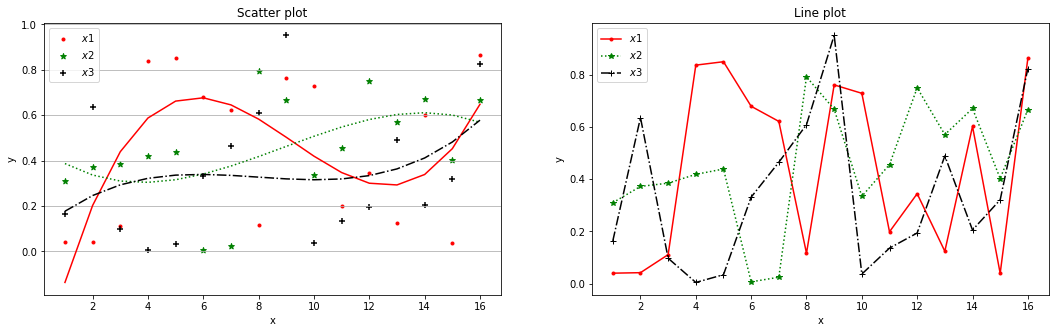

In [237]:
colors =["red","green","black"]
markers=[".","*","+"]
linestyles=['solid','dotted','dashdot']
index=0
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
for y_col in y:
    parameter = np.polyfit(x, y_col, 3)
    p = np.poly1d(parameter)
    plt.scatter(x, y_col,label='$'+labels[index]+'$',color=colors[index],marker=markers[index])
    plt.plot(x, p(x), color=colors[index],linestyle=linestyles[index])
    plt.legend()
    index=index+1
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(axis='y')

index=0
plt.subplot(1, 2, 2)
for y_col in y:
    plt.plot(x, y_col,label='$'+labels[index]+'$',color=colors[index],marker=markers[index],linestyle=linestyles[index])
    plt.legend()
    index=index+1
plt.title("Line plot")
plt.xlabel("x")
plt.ylabel("y")

plt.show()


## 7. 其中拟合曲线分别为

$f(x_1) = 0.002365 x^3 - 0.06542 x^2 + 0.519 x - 0.5929$

$f(x_2) = -0.0005858 x^3 + 0.01561 x^2 - 0.09332 x + 0.4652$

$f(x_3) = 0.0006149 x^3 - 0.01471 x^2 + 0.109 x + 0.08203$